<a href="https://colab.research.google.com/github/AndreuMartinezG/ModeloRedNeuronalCelsiusFahrenheit/blob/main/Modelo_Celsius_a_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [4]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.05),
    loss ='mean_squared_error'
)

In [5]:
print("Comenzando Entrenamiento..")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Primer Modelo entrenado!!!!")

Comenzando Entrenamiento..
Primer Modelo entrenado!!!!


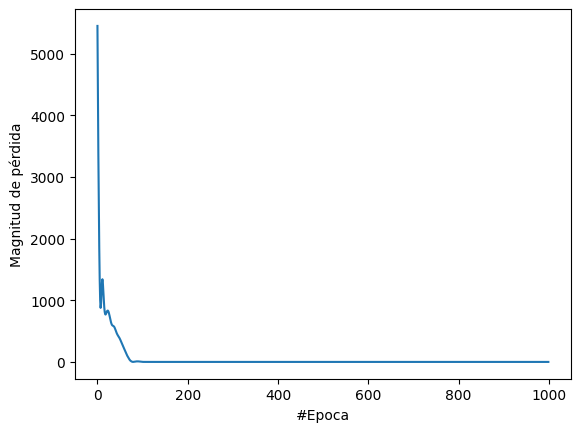

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([-50.0])
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una predicción!
1/1 [==============================] - 0s 176ms/step
El resultado es [[-57.944923]] fahrenheit


In [ ]:
print("Variables internas del modelo")
print(str(oculta1.get_weights()) + "capa Oculta1")
print(str(oculta2.get_weights()) + "capa Oculta2")
print(str(salida.get_weights()) + "salida")

Variables internas del modelo
[array([[0.28758192, 0.40515342, 0.24837488]], dtype=float32), array([3.5576491, 3.5644438, 3.5340633], dtype=float32)]capa Oculta1
[array([[ 0.31991085, -1.3504404 ,  1.1510967 ],
       [-0.4358555 , -0.86867124,  0.24779804],
       [ 0.20871437, -1.4263015 ,  0.35680377]], dtype=float32), array([-0.7188234, -3.5415976,  3.5280333], dtype=float32)]capa Oculta2
[array([[-0.24572238],
       [-1.2509702 ],
       [ 0.8088306 ]], dtype=float32), array([3.3351412], dtype=float32)]salida


In [8]:
#Exportar el modelo en formato h5
modelo.save('celsius_a_fahrenheit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [10]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [11]:
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2023-11-26 22:32:06.196804: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 22:32:06.196878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 22:32:06.198473: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 22:32:07.762244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
